In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("Set2")

# Project
## Car Price Prediction EDA Analysis

In [6]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\car_price_prediction_.csv")

# Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [8]:
df.shape

(2500, 10)

In [9]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


# Data Cleaning & Handling

In [10]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop("Car ID",axis=1,inplace=True)

# EDA & Visualization

In [12]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


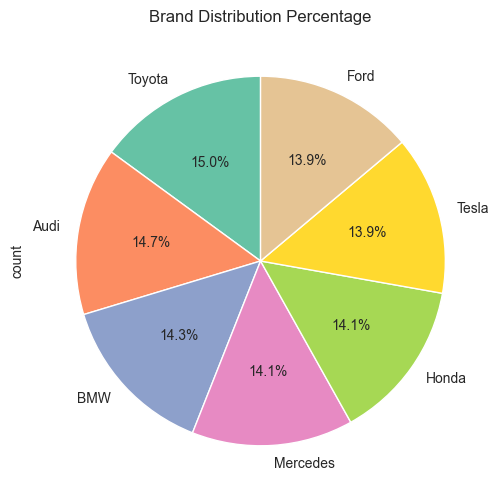

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df["Brand"].value_counts().plot(kind="pie", autopct="%1.1f%%",startangle=90)
plt.title("Brand Distribution Percentage")
plt.show()

## Car Price Trend By Car Condition

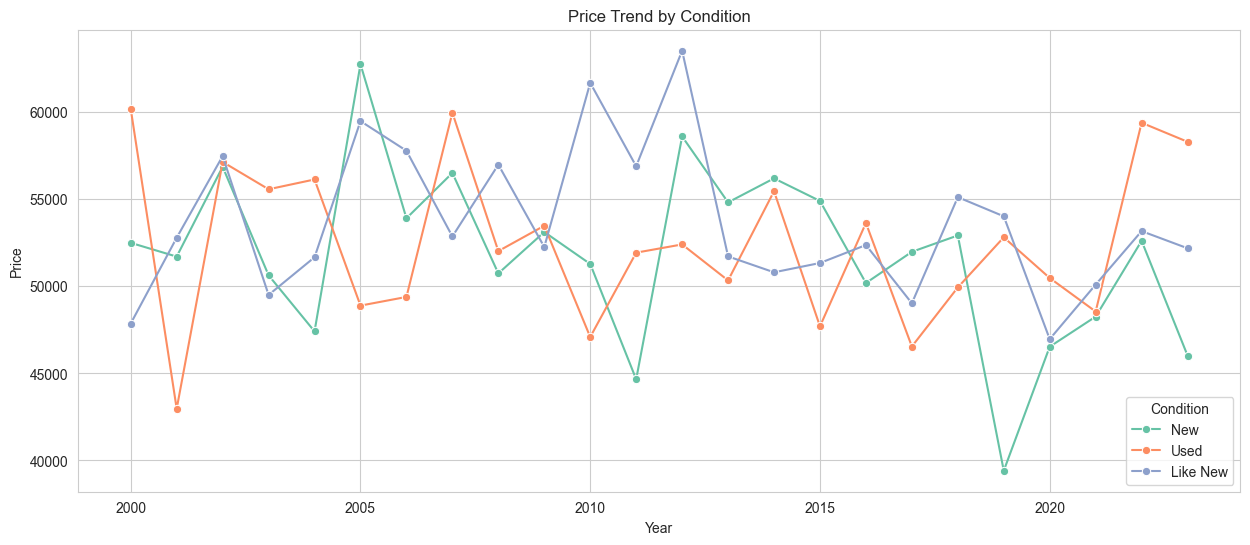

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.lineplot(data=df, x="Year", y="Price", hue="Condition", marker="o",ci=None)
plt.title("Price Trend by Condition")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()


## Relation Between Engine Size,fuel Price and Price

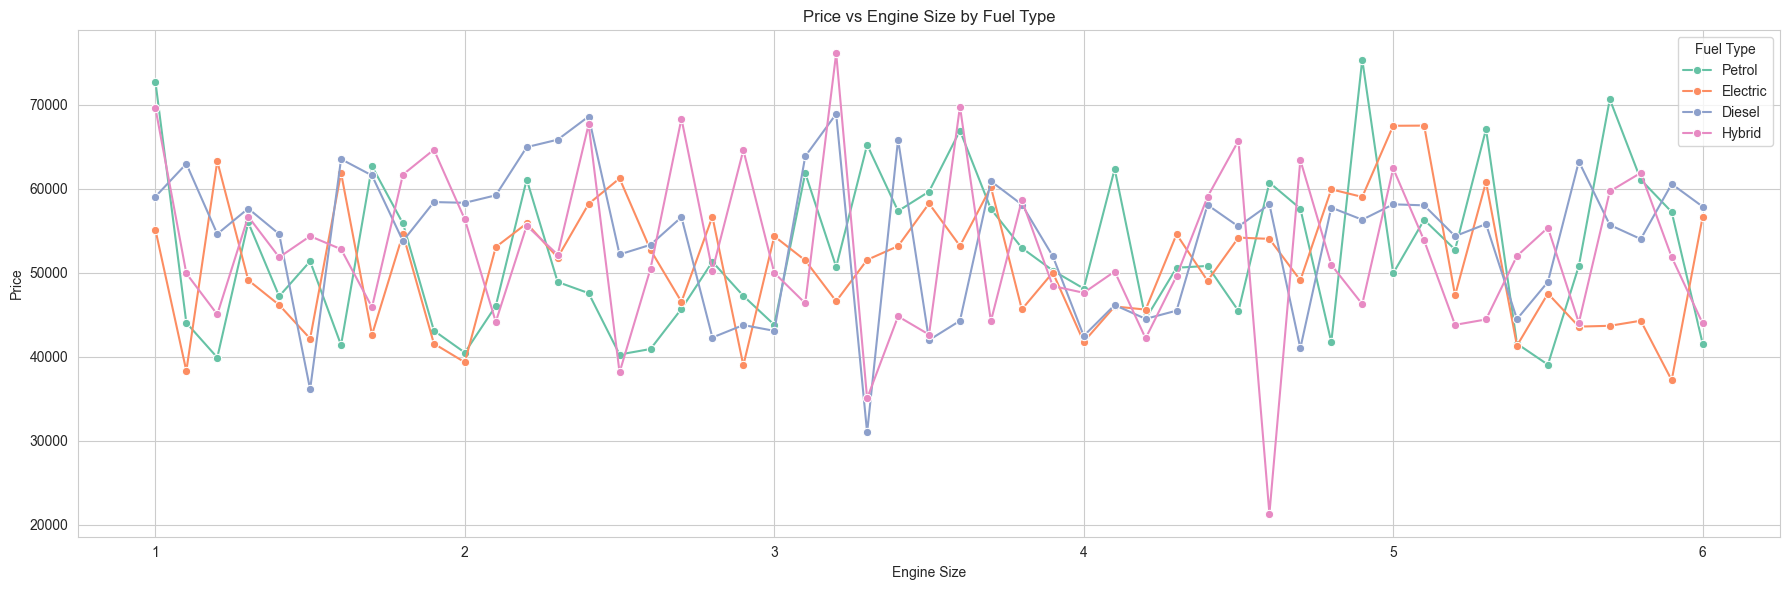

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,6))  
sns.lineplot(data=df, x="Engine Size", y="Price",marker="o",hue="Fuel Type",ci=None)
plt.title("Price vs Engine Size by Fuel Type")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [16]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


## Filter out the new condition car models and see the year and price time series trend 

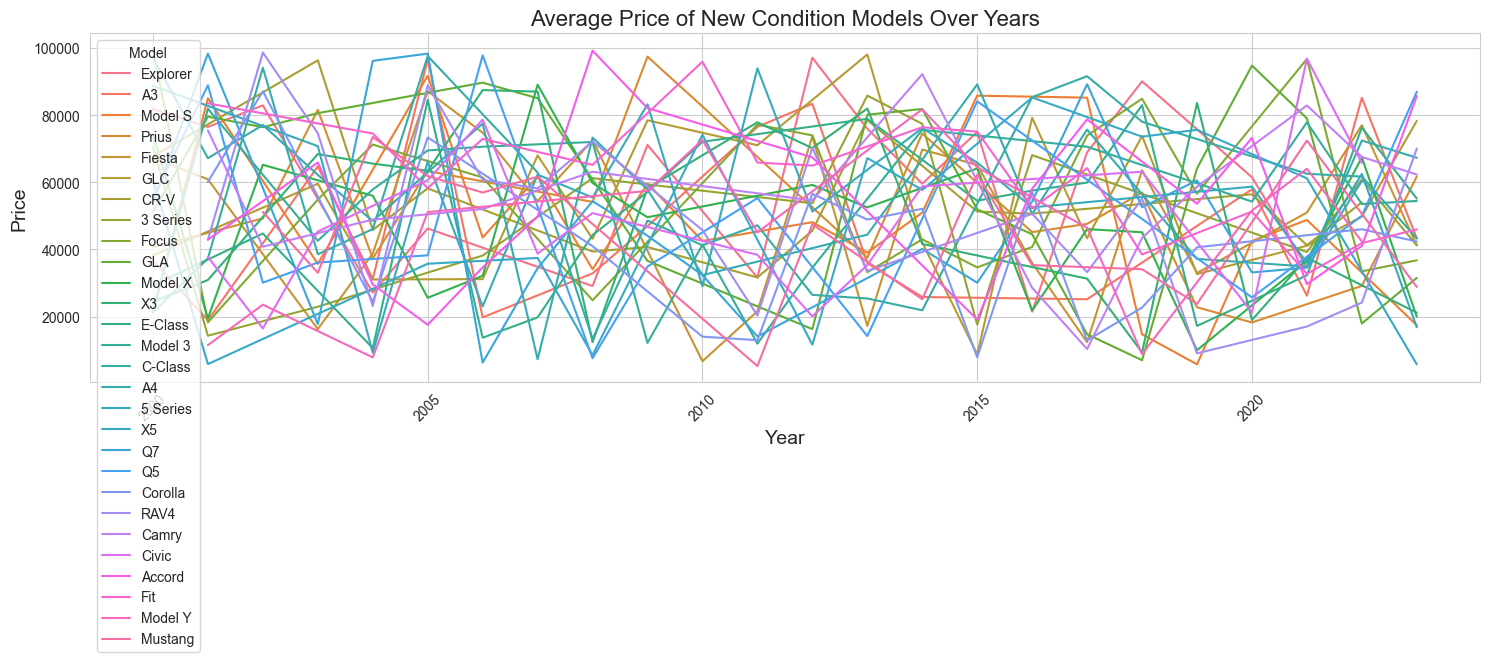

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and sort the data
new_condition = df[df["Condition"] == "New"].sort_values(by="Year", ascending=True)

# Set up the plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=new_condition, x="Year", y="Price", hue="Model", ci=None)

# Optional: improve readability
plt.title("Average Price of New Condition Models Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import plotly.express as px

# Filter and sort the data
new_condition = df[df["Condition"] == "New"].sort_values(by="Year", ascending=True)
new_condition_gr = new_condition.groupby(["Year","Brand"])["Price"].mean().reset_index().sort_values(by="Year", ascending=True)
new_condition_gr
# Create interactive line plot
fig = px.line(
    new_condition_gr,
    x="Year",
    y="Price",
    color="Brand",
    markers=True,
    title="Average Price of New Condition Brands Over Years",
    template="plotly_white"
)
fig.show()

<Axes: xlabel='Brand'>

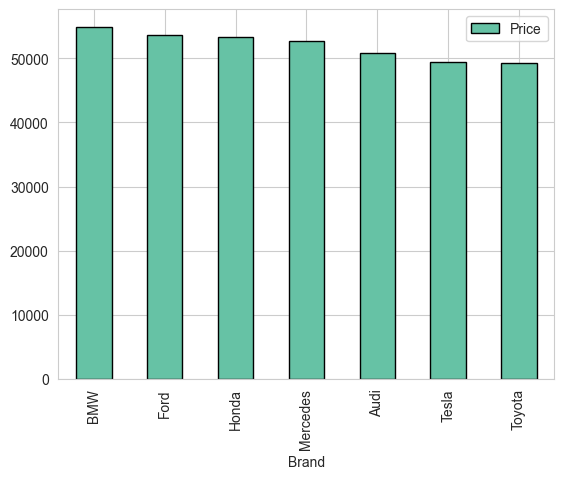

In [19]:
new_condition_pr=new_condition.groupby(["Brand","Condition"])["Price"].mean().reset_index()
new_condition_pr.sort_values(by="Price",ascending=False).plot(kind="bar",x="Brand",y="Price",edgecolor="black")


In [20]:
used_condition=df[df["Condition"]=="Used"]
used_condition_gr = used_condition.groupby(["Year","Brand"])["Price"].mean().reset_index().sort_values(by="Year", ascending=True)
used_condition_gr
fig = px.line(
    used_condition_gr,
    x="Year",
    y="Price",
    color="Brand",
    markers=True,
    title="Average Price of Used Condition Brands Over Years",
    template="plotly_white"
)
fig.show()

<Axes: xlabel='Brand'>

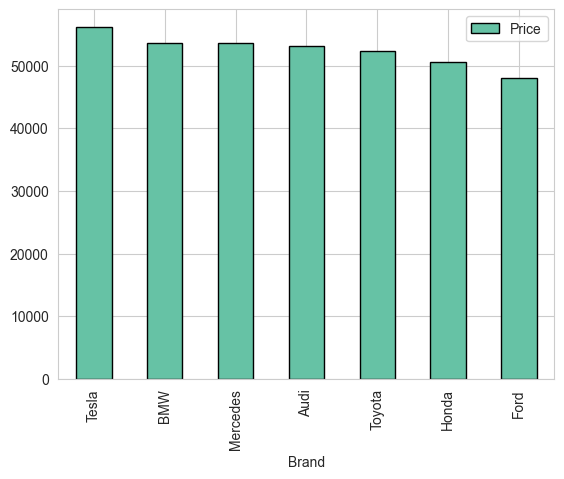

In [21]:
used_condition_pr=used_condition.groupby(["Brand","Condition"])["Price"].mean().reset_index()
used_condition_pr.sort_values(by="Price",ascending=False).plot(kind="bar",x="Brand",y="Price",edgecolor="black")


<Axes: title={'center': 'Transmission Distribution'}, ylabel='count'>

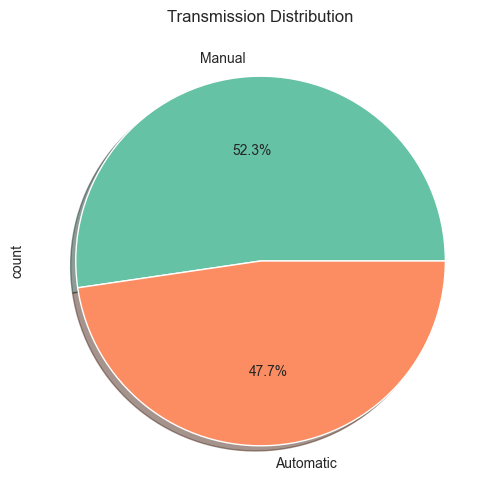

In [27]:
df["Transmission"].value_counts().plot(kind="pie",autopct="%1.1f%%",title="Transmission Distribution",figsize=(10,6),shadow=True)

In [24]:
br_ml=df.groupby(["Brand","Model"])['Mileage'].mean().sort_values(ascending=False).reset_index()
br_ml
fig=px.bar(br_ml,x="Model",y="Mileage",color="Brand")
fig.update_layout(title="Average Mileage Of Different Models And Their Brands")

In [23]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


Text(0.5, 1.0, 'Correalation Heatmap')

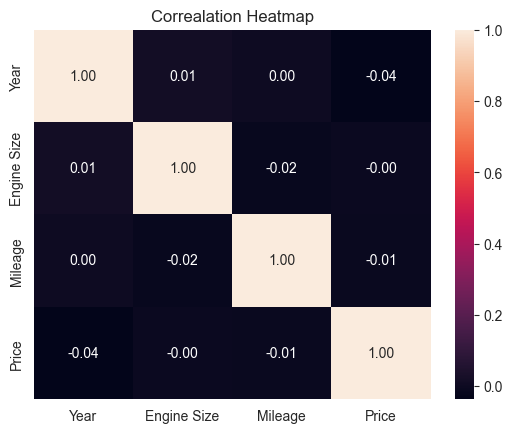

In [30]:
cor=df.select_dtypes(include="number").corr()
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.title("Correalation Heatmap")